## Tratamendo de dados faltantes (NaN) com Pandas
Diagnosticar, visualizar e aplicar as principais estratégias de tratamento de dados faltantes (NaN)

In [3]:
# Importando as bibliotecas essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando uma cópia "fresca" do dataset para nossa análise 
df_titanic = pd.read_csv('Titanic-Dataset.csv')

print("Ambiente pronto. Dataset Titanic carregado.")
df_titanic.head()

Ambiente pronto. Dataset Titanic carregado.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A investigação - Contando e Entendendo os NaNs

In [4]:
# Gerando um relatório de valores nulos por coluna 
print("Relatório de Dados Faltantes")
dados_faltantes = df_titanic.isnull().sum()
print(dados_faltantes[dados_faltantes > 0].sort_values(ascending=False))

Relatório de Dados Faltantes
Cabin       687
Age         177
Embarked      2
dtype: int64


## O resultado acima é o nosso "boletim de ocorrência". Ele nos informa que:
- A coluna Cabin é o nosso maior problema, com 687 valores faltantes.
- A coluna Age tem um número significativo de buracos (177).
- A coluna Embarked tem um problema menor, com apenas 2 valores faltantes.
  

## Usaremos a biblioteca seaborn para criar um mapa de calor dos nossos dados nulos.

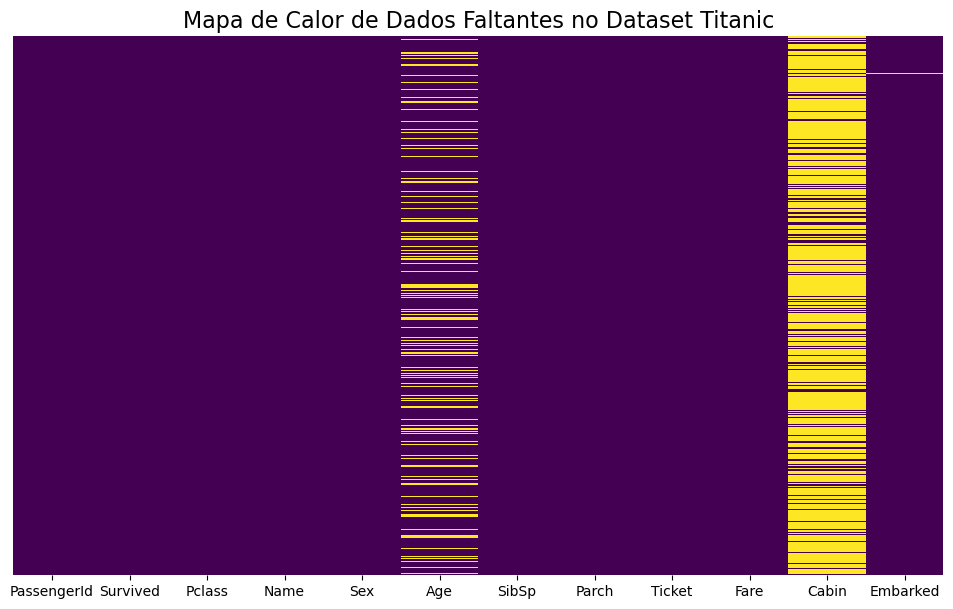

In [5]:
# Configurando o tamanho do gráfico para melhor visualização
plt.figure(figsize=(12, 7))

# Criando o mapa de calor
sns.heatmap(df_titanic.isnull(), cbar=False, yticklabels=False,cmap='viridis')

# Adicionando um título profissional
plt.title('Mapa de Calor de Dados Faltantes no Dataset Titanic', fontsize=16)
plt.show()

# Cada faixa amarela representa um dado faltante. A visualização confirma brutalmente o que os números nos disseram:
Cabin é um grande borrão amarelo, quase inutilizável. Age tem "buracos" espalhados por todo o dataset, mostrando que o problema não está concentrado em um único grupo de passageiros.

## Estrátegia de Remoção (.drop() e .dropna())
A primeira estratégia de limpeza é a mais simples: remover o que não tem conserto. Isso pode ser feito em colunas, ou em linhas.

In [7]:
## Removendo a Coluna Cabin. Como a coluna está 77% vazia, a decisão mais sensata é removê-la.
# O argumento axis=1 especifica que estamos removendo uma coluna.
# O inplace=True modifica o DataFrame original diretamente.
df_titanic.drop(columns=['Cabin'], inplace=True)

print("Coluna 'Cabin' removida com sucesso.")
print(f"Número de colunas agora: {df_titanic.shape[1]}")

Coluna 'Cabin' removida com sucesso.
Número de colunas agora: 11


## O Perigo de Remover Linhas:
Vamos simular o que aconteceria se removêssemos todas as linhas com qualquer valor nulo.

In [11]:
print("Tamanho original do dataset: {df_titanic.shape[0]} linhas.")
df_simulacao_dropna = df_titanic.dropna()
print(f"Tamanho após .dropna() em todas as linhas: {df_simulacao_dropna.shape[0]} linhas.")
print(f"Perderíamos {df_titanic.shape[0] - df_simulacao_dropna.shape[0]} regristros! Inaceitável.")

Tamanho original do dataset: {df_titanic.shape[0]} linhas.
Tamanho após .dropna() em todas as linhas: 712 linhas.
Perderíamos 179 regristros! Inaceitável.


## Estratégia de Preenchimento/Imputação: .filna()
Estaremos preenchendo os buracos com um valor estatísticamente provável.
- Para colunas numérricas (Age), usamos a média ou a mediana.
- Para colunas categóricas (Embarked), usamos a moda (o valor mais frequente).

In [23]:
## Tratando a coluna Age (numérica)
# 1. Calcular a média de idade, que será nosso valor de preenchimento
media_idade = df_titanic['Age'].mean()
print(f"A idade média para preenchimento é: {media_idade: .2f} anos.")

# 2. Aplicar o .fillna()
df_titanic['Age'] = df_titanic['Age'].fillna(media_idade)

# 3. Verificar o resultado 
print(f"\nNulos em 'Age' após o tratamento: {df_titanic['Age'].isnull().sum()}")

A idade média para preenchimento é:  29.70 anos.

Nulos em 'Age' após o tratamento: 0


In [28]:
## Tratando a Coluna Embarked (Categórica)
# 1. Encontrar a moda, que será nosso valor de preenchimento
moda_embarque = df_titanic['Embarked'].mode()[0]
print(f"O porto de embarque mais comum (moda) é: '{moda_embarque}'")

# 2. Aplicar o .fillna()
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(moda_embarque)

# 3. Verificar o resultado final 
print(f"\nNulos em 'Embarked' após o tratamento: {df_titanic['Embarked'].isnull().sum()}")


O porto de embarque mais comum (moda) é: 'S'

Nulos em 'Embarked' após o tratamento: 0


## Agora que executamos um ciclo completo de limpeza de dados. 
Diagnosticamos, visualizamos, e aplicamos as estratégias corretas para cada tipo de problema.

In [29]:
# Execução do comando final de verificação para confirmar que nosso trabalho foi um sucesso.
print("Relatório final de dados faltantes:")
print(df_titanic.isnull().sum())
print("\nNosso dataset está limpo e pronto para análise!")

Relatório final de dados faltantes:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Nosso dataset está limpo e pronto para análise!


## Agregação e Insights com .groupby()
Iremos dominar o processo "Split-Apply-Combine" usando .groupby() para calcular estatísticas agregadas por categoria e extrair insights de negócio.

## O .groupby() executa um processo de três passos, chamado Split-Apply-Combine:
1. Split(Dividir): Ele "fatia" seu DataFrame em grupos menores com base em uma categoria que definimos.
2. Apply(Aplicar): Ele aplica uma função matemática a cada um desses grupos de forma independente.
3. Combine(Combinar): Ele junta os resultados de cada grupo em um novo DataFrame, mostrando o resultado da sua agregação para cada categoria.

## O .groupby() em ação:

In [46]:
# Pergunta 1: Qual a idade média dos passageiros por sexo?
media_idade_por_sexo = df_titanic.groupby('Sex')['Age'].mean()

print("Idade média por sexo:")
print(media_idade_por_sexo)

Idade média por sexo:
Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64


In [47]:
# Pergunta 2: Qual foi a tarifa (Fare) média paga por cada classe(Pclass)?
tarifa_media_por_classe = df_titanic.groupby('Pclass')['Fare'].mean()

print("\nTarifa média por classe:")
print(tarifa_media_por_classe)


Tarifa média por classe:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


## Insight rápido:
De acordo com o resultado acima, fica evidente a disparidade social a bordo: Um passageiro da 1° classe pagou, em média, mais de 6 vezes o valor pago por um passageiro da 3° classe.

## Agregações avançadas e Múltiplos Grupos: 
Para mais de uma informação por grupo, usaremos .agg()

In [48]:
## Pergunta 3: Para cada classe, qual foi a idade média, a idade máxima e o desvio padrão?
# Passamos uma lista de funções de agregação para o método .agg()
stats_por_classe = df_titanic.groupby('Pclass')['Age'].agg(['mean', 'max', 'std'])

print("Estatísticas de Idade por Classe:")
print(stats_por_classe)

Estatísticas de Idade por Classe:
             mean   max        std
Pclass                            
1       37.048118  80.0  14.046369
2       29.866958  70.0  13.573825
3       26.403259  74.0  10.815245


## Análise: agrupar por múltiplas categorias.
A Análise Definitiva do Titanic: Qual a taxa de sobrevivência(Survived) por CLASSE e por SEXO?

In [49]:
# Agrupamos por uma lista de colunas: ['Pclass', 'Sex']
# Lembre-se: a média da coluna 'Survived' (que é 0 ou 1) nos dá a taxa de sobrevivencia!
taxa_sobrevivencia = df_titanic.groupby(['Pclass', 'Sex'])['Survived'].mean()

print("\nTaxa de Sobrevivência por Classe e Sexo:")
print(taxa_sobrevivencia)


Taxa de Sobrevivência por Classe e Sexo:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


## Este último resultado é a história do Titanic em 8 linhas de dados.
Ele mostra, de forma inquestionável: 
1. Que uma mulher na primeira classe tinha ~96% de chance de sobreviver
2. Que um homem na terceira classe tinha apenas ~13% de chance de sobreviver.